In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
seed = 101

truths = pd.read_csv('../data/tracks/test_stars/test_stars_outputs.csv')
truths.head()

,index,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,age_weights
0,0,1.0,0.85397,0.25364,0.014426,0.03700,2.00798,0.85397,7.046015,0.398266,5200.535430,0.445522,0.823374,4.538138,0.228446,0.013172,-0.017916,167.944271,0.398266,0.199418
1,1,1.0,0.85854,0.27288,0.017527,0.13517,1.84533,0.85854,7.349840,0.435597,5169.130768,0.460919,0.847689,4.515177,0.244816,0.015969,0.076846,161.360379,0.435597,0.196443
2,2,1.0,0.86302,0.29363,0.028322,0.36335,1.99334,0.86302,3.216747,0.174959,4893.183014,0.323551,0.792587,4.575816,0.282007,0.027385,0.340614,178.462162,0.174959,0.033333
3,3,1.0,0.86445,0.27088,0.012056,-0.03175,1.89884,0.86445,5.086326,0.372984,5427.143855,0.555922,0.844546,4.521383,0.246552,0.011104,-0.082774,162.451236,0.372984,0.126204
4,4,1.0,0.86455,0.28837,0.018435,0.16724,1.90678,0.86455,7.930125,0.528107,5297.480060,0.542283,0.875454,4.490213,0.255423,0.016633,0.101207,154.279390,0.528107,0.179025


What are the typical distributions of errors on observables?

In [3]:
df = pd.read_csv('../data/isoclassify/isoclassify_outputs_DR14_ASPC.csv')
df.head()

,id_starname,teff,teff_err,logg,logg_err,feh,feh_err,lum,lum_err,gmag,...,dir_teff_err2,dir_mabs,dir_mabs_err1,dir_mabs_err2,dir_mass,dir_mass_err1,dir_mass_err2,dir_rho,dir_rho_err1,dir_rho_err2
0,KIC5950854,5914.0347,134.60000,4.237158,0.009836,-0.173085,0.073964,-99,0,-99,...,-134.60000,2.726344,0.036510,-0.036819,0.0,0.0,-0.0,0.0,0.0,-0.0
1,KIC7799349,4976.7870,82.60566,3.670984,0.007718,0.284619,0.029484,-99,0,-99,...,-82.60566,1.213493,0.033218,-0.033533,0.0,0.0,-0.0,0.0,0.0,-0.0
2,KIC5822889,5184.0103,94.43386,3.401706,0.012167,-0.026246,0.039186,-99,0,-99,...,-94.43386,0.192337,0.057803,-0.058261,0.0,0.0,-0.0,0.0,0.0,-0.0
3,KIC12069569,6062.4185,168.10576,3.825712,0.060999,-0.084244,0.066659,-99,0,-99,...,-168.10576,1.316289,0.043069,-0.043379,0.0,0.0,-0.0,0.0,0.0,-0.0
4,KIC6947945,5334.4380,103.46670,3.794063,0.011004,-0.041512,0.043107,-99,0,-99,...,-103.46670,1.598508,0.042779,-0.043015,0.0,0.0,-0.0,0.0,0.0,-0.0


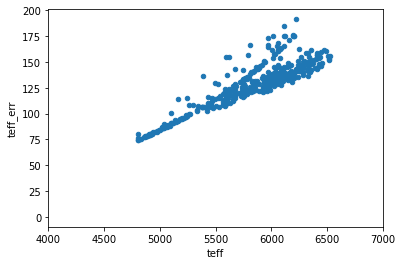

In [4]:
df.plot(kind='scatter', x='teff', y='teff_err', xlim=[4000, 7000])

median = 0.02197
std = 0.00309


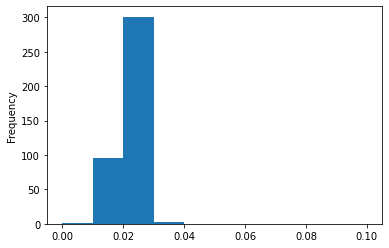

In [5]:
df['teff_rel_err'] = (df['teff_err'] / df['teff'])
df['teff_rel_err'].plot(kind='hist', range=(0.0, 0.1))
cond = df['teff_rel_err'] < 1.0
print(f"median = {df['teff_rel_err'][cond].median():.5f}")
print(f"std = {df['teff_rel_err'][cond].std():.5f}")

In [6]:
teff_mle = stats.lognorm.fit(df['teff_rel_err'][df['teff']>0], floc=0.0)
teff_mle

(0.13532895754831747, 0.0, 0.021573821798650347)

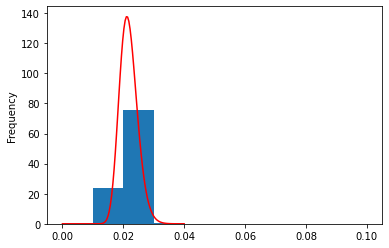

In [7]:
x = np.linspace(0.0, 0.04, 100)
pdf = stats.lognorm.pdf(x, *teff_mle)
ax = df['teff_rel_err'].plot(kind='hist', range=(0.0, 0.1), density=True)
ax.plot(x, pdf, 'r');

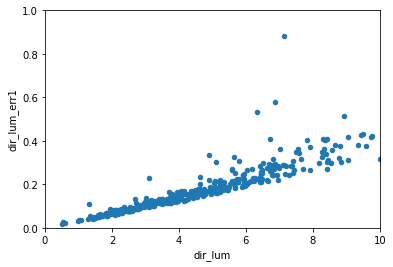

In [8]:
df.plot(kind='scatter', x='dir_lum', y='dir_lum_err1', xlim=[0, 10], ylim=[0, 1])

median = 0.03546
std = 0.05367


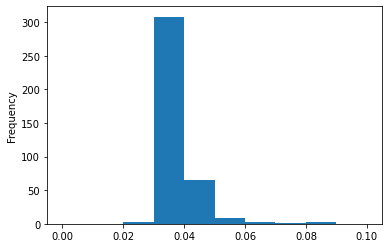

In [9]:
df['dir_lum_rel_err'] = (df['dir_lum_err1'] / df['dir_lum'])
df['dir_lum_rel_err'].plot(kind='hist', range=(0.0, 0.1))
lum_cond = df['dir_lum_rel_err'] < 1.0
print(f"median = {df['dir_lum_rel_err'][lum_cond].median():.5f}")
print(f"std = {df['dir_lum_rel_err'][lum_cond].std():.5f}")

In [10]:
lum_mle = stats.lognorm.fit(df['dir_lum_rel_err'][lum_cond])  #, floc=0.0)
lum_mle

(0.8347336476536897, 0.02911026149117268, 0.006457817056870006)

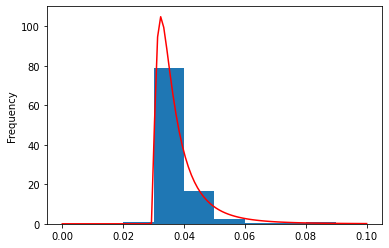

In [11]:
x = np.linspace(0.0, 0.1, 100)
pdf = stats.lognorm.pdf(x, *lum_mle)
ax = df['dir_lum_rel_err'].plot(kind='hist', range=(0.0, 0.1), density=True)
ax.plot(x, pdf, 'r');

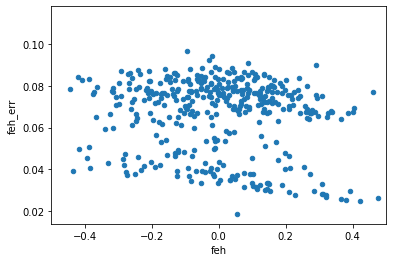

In [12]:
df.plot(kind='scatter', x='feh', y='feh_err', xlim=[-0.5, 0.5])  #, ylim=[0, 0.2])

median = 0.07260
std = 0.01770


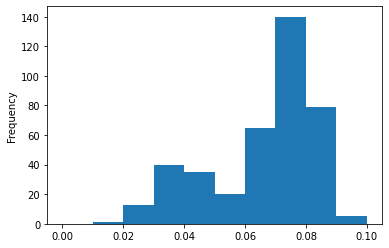

In [13]:
df['feh_err'].plot(kind='hist', range=(0.0, 0.1))
print(f"median = {df['feh_err'].median():.5f}")
print(f"std = {df['feh_err'].std():.5f}")

In [14]:
mhs_mle = stats.lognorm.fit(df['feh_err'], floc=0.0)
mhs_mle

(0.3235915167355602, 0.0, 0.06360030421579696)

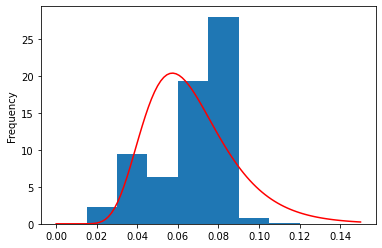

In [15]:
x = np.linspace(0.0, 0.15, 100)
pdf = stats.lognorm.pdf(x, *mhs_mle)
ax = df['feh_err'].plot(kind='hist', range=(0.0, 0.15), density=True)
ax.plot(x, pdf, 'r');

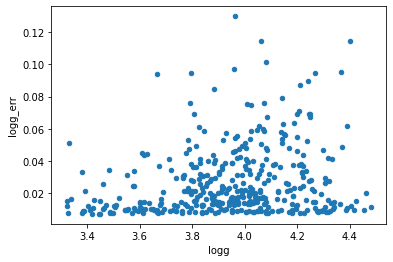

In [16]:
df.plot(kind='scatter', x='logg', y='logg_err')

median = 0.00488
std = 0.00514


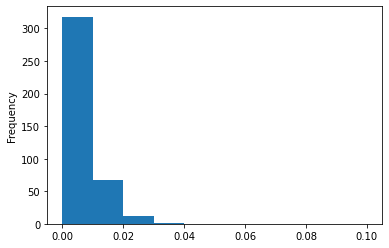

In [17]:
df['logg_rel_err'] = (df['logg_err'] / df['logg'])
df['logg_rel_err'].plot(kind='hist', range=(0.0, 0.1))
# lum_cond = df['logg_rel_err'] < 1.0
print(f"median = {df['logg_rel_err'].median():.5f}")
print(f"std = {df['logg_rel_err'].std():.5f}")

In [18]:
logg_mle = stats.lognorm.fit(df['logg_rel_err'], floc=0.0)
logg_mle

(0.6729351841802348, 0.0, 0.005311703937007749)

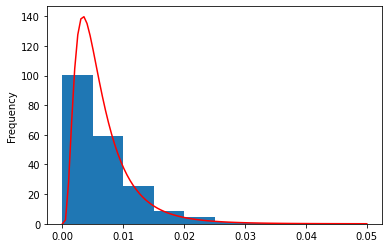

In [19]:
x = np.linspace(0.0, 0.05, 100)
pdf = stats.lognorm.pdf(x, *logg_mle)
ax = df['logg_rel_err'].plot(kind='hist', range=(0.0, 0.05), density=True)
ax.plot(x, pdf, 'r');

In [20]:
seis = pd.read_csv('../data/serenelli2017/s17_seis.csv')
seis.head()

,KIC,numax,enumax,Dnu,eDnu,Length,HBR
0,1435467,1382.311,19.038,70.558,0.087,938.1,1.662
1,2010607,674.919,146.523,42.479,2.185,28.9,1.547
2,2309595,643.208,11.226,39.029,0.721,28.9,1.767
3,2450729,1053.105,114.904,61.910,2.539,28.9,1.470
4,2837475,1629.761,18.396,75.720,0.129,1029.4,1.767


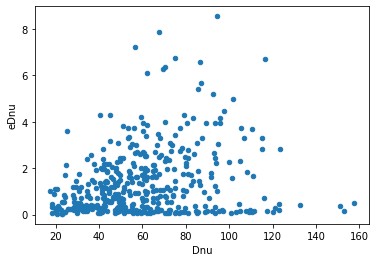

In [21]:
seis.plot(kind='scatter', x='Dnu', y='eDnu')
# , xlim=[-0.5, 0.5], ylim=[0, 0.2])

median = 0.01700
std = 0.02247


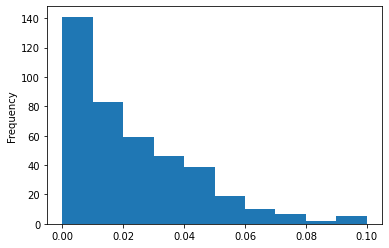

In [22]:
seis['eDnu_rel'] = (seis['eDnu'] / seis['Dnu'])
seis['eDnu_rel'].plot(kind='hist', range=(0.0, 0.1))
print(f"median = {seis['eDnu_rel'].median():.5f}")
print(f"std = {seis['eDnu_rel'].std():.5f}")

In [23]:
dnu_mle = stats.lognorm.fit(seis['eDnu_rel'], floc=0.0)
dnu_mle

(1.194160497523479, 0.0, 0.014032593617570458)

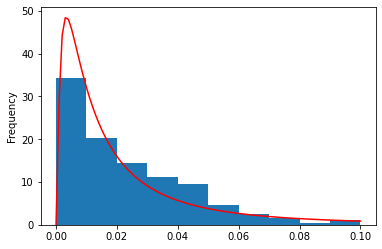

In [24]:
x = np.linspace(0.0, 0.1, 100)
pdf = stats.lognorm.pdf(x, *dnu_mle)
ax = seis['eDnu_rel'].plot(kind='hist', range=(0.0, 0.1), density=True)
ax.plot(x, pdf, 'r');

Generate our error distributions.

In [33]:
np.random.seed(seed)
n = len(truths)
teff_err = truths['effective_T'] * df.teff_rel_err.median()
lum_err = truths['luminosity'] * df.dir_lum_rel_err.median()
mhs_err = np.ones(n) * df.feh_err.median()
logg_err = np.ones(n) * df.logg_err.median()
dnu_err = np.ones(n) * seis.eDnu.median()
# teff_err = df['teff_rel_err'].median() * np.random.lognormal(0.0, 
#                                                              df['teff_rel_err'].std()*df['teff_rel_err'].median(), n)
# lum_err = 0.04 * truths['luminosity'] * np.random.lognormal(0.0, 0.1, n)
# mhs_err = 0.08 * np.random.lognormal(0.0, 0.2, n)
# dnu_err = 0.008 * truths['delta_nu_fit'] * np.random.lognormal(0.0, 0.8, n)

In [36]:
teff_err

0     114.277805
1     113.587711
2     107.523969
3     119.257352
4     116.408089
         ...    
95    110.691165
96    128.079623
97    123.753063
98    119.572083
99    120.707617
Name: effective_T, Length: 100, dtype: float64

In [34]:
# np.random.seed(seed)
# n = len(truths)
# teff_err = truths['effective_T'] * stats.lognorm.rvs(*teff_mle, size=n)
# lum_err = truths['luminosity'] * stats.lognorm.rvs(*lum_mle, size=n)
# mhs_err = stats.lognorm.rvs(*mhs_mle, size=n)
# logg_err = truths['log_g'] * stats.lognorm.rvs(*logg_mle, size=n)
# dnu_err = truths['delta_nu_fit'] * stats.lognorm.rvs(*dnu_mle, size=n)

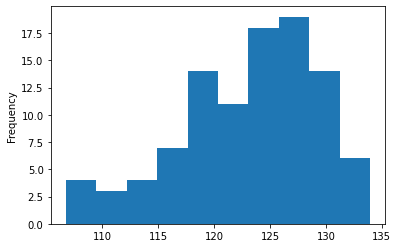

In [37]:
teff_err.plot(kind='hist')

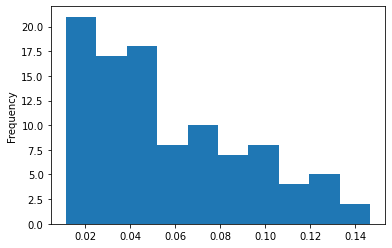

In [38]:
lum_err.plot(kind='hist')

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.42739576, -0.32739576, -0.22739576, -0.12739576, -0.02739576,
         0.07260424,  0.17260424,  0.27260424,  0.37260424,  0.47260424,
         0.57260424]),
 <a list of 10 Patch objects>)

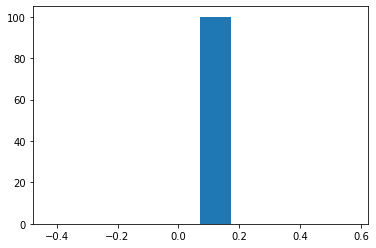

In [44]:
plt.hist(mhs_err)

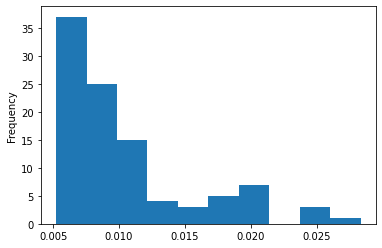

In [45]:
(dnu_err / truths['delta_nu_fit']).plot(kind='hist')

In [46]:
obs_cols = {'effective_T': 'teff', 'luminosity': 'lum', 'star_feh': 'mhs', 'log_g': 'logg', 
            'delta_nu_fit': 'dnu'}
obs_err = pd.DataFrame(np.array([teff_err, lum_err, mhs_err, logg_err, dnu_err]).T,
                      columns=[f'{col}_err' for col in obs_cols.values()])
obs_err.head()

,teff_err,lum_err,mhs_err,logg_err,dnu_err
0,114.277805,0.015823,0.072604,0.019638,0.933
1,113.587711,0.016370,0.072604,0.019638,0.933
2,107.523969,0.011491,0.072604,0.019638,0.933
3,119.257352,0.019744,0.072604,0.019638,0.933
4,116.408089,0.019259,0.072604,0.019638,0.933


In [47]:
obs = truths[obs_cols.keys()].rename(columns=obs_cols) + obs_err.to_numpy() * np.random.normal(size=(n, len(obs_cols)))
obs.head()

,teff,lum,mhs,logg,dnu
0,5509.868287,0.455461,0.048007,4.548031,168.551764
1,5132.860162,0.447037,0.120842,4.475545,162.050913
2,4950.043140,0.316783,0.354314,4.560913,177.591451
3,5541.041366,0.559689,0.060892,4.572558,163.088949
4,5332.712767,0.574903,-0.022662,4.467451,154.153583


In [48]:
obs = obs.join(obs_err)
obs.head()

,teff,lum,mhs,logg,dnu,teff_err,lum_err,mhs_err,logg_err,dnu_err
0,5509.868287,0.455461,0.048007,4.548031,168.551764,114.277805,0.015823,0.072604,0.019638,0.933
1,5132.860162,0.447037,0.120842,4.475545,162.050913,113.587711,0.016370,0.072604,0.019638,0.933
2,4950.043140,0.316783,0.354314,4.560913,177.591451,107.523969,0.011491,0.072604,0.019638,0.933
3,5541.041366,0.559689,0.060892,4.572558,163.088949,119.257352,0.019744,0.072604,0.019638,0.933
4,5332.712767,0.574903,-0.022662,4.467451,154.153583,116.408089,0.019259,0.072604,0.019638,0.933


In [49]:
obs.to_csv('../data/tracks/test_stars/test_stars_obs.csv', index_label='index')

<ErrorbarContainer object of 3 artists>

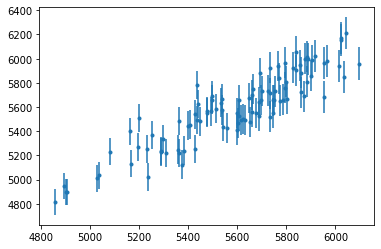

In [50]:
plt.errorbar(truths['effective_T'], obs['teff'], yerr=obs['teff_err'], fmt='.')

<ErrorbarContainer object of 3 artists>

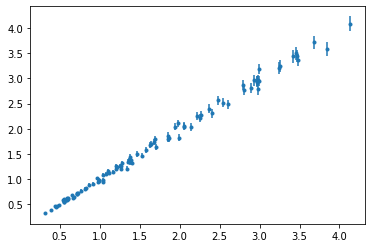

In [51]:
plt.errorbar(truths['luminosity'], obs['lum'], yerr=obs['lum_err'], fmt='.')

<ErrorbarContainer object of 3 artists>

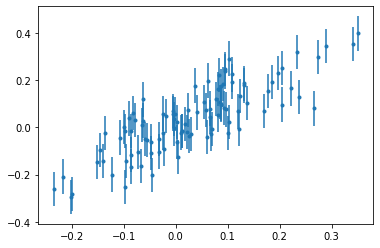

In [52]:
plt.errorbar(truths['star_feh'], obs['mhs'], yerr=obs['mhs_err'], fmt='.')

<ErrorbarContainer object of 3 artists>

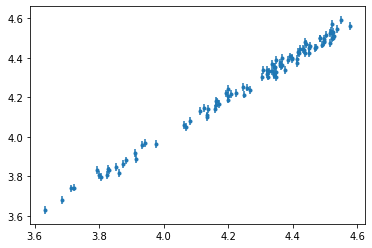

In [53]:
plt.errorbar(truths['log_g'], obs['logg'], yerr=obs['logg_err'], fmt='.')

<ErrorbarContainer object of 3 artists>

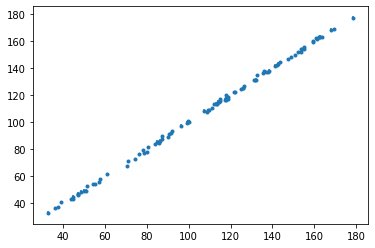

In [54]:
plt.errorbar(truths['delta_nu_fit'], obs['dnu'], yerr=obs['dnu_err'], fmt='.')